# Voter Frequency Dataset Analysis

## Understanding and Analyzing the dataset
We will be making a correlation matrix, catplot, and pairplot to analyze our dataset.

### Correlation Matrix

<Axes: >

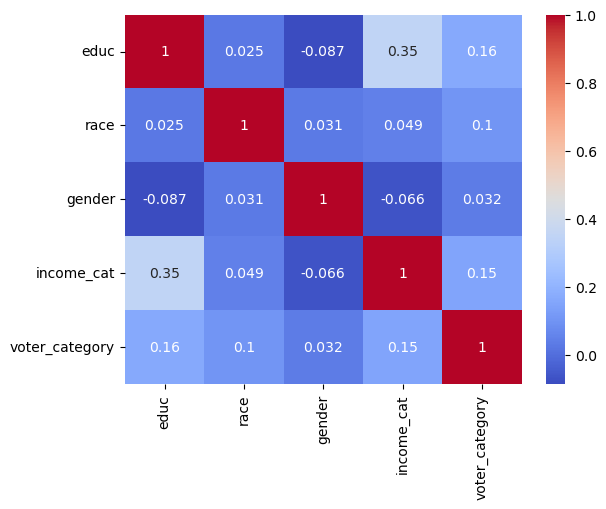

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('nonvoters_dataset.csv')

# Drop RespId column
df = df.drop(['RespId'], axis=1)

# Convert categorical variables to numerical using pandas factorize function
df['educ'] = pd.factorize(df['educ'])[0]
df['race'] = pd.factorize(df['race'])[0]
df['gender'] = pd.factorize(df['gender'])[0]
df['income_cat'] = pd.factorize(df['income_cat'])[0]
df['voter_category'] = pd.factorize(df['voter_category'])[0]

# Create a correlation matrix using seaborn
corr_matrix = df.corr()

# Plot the correlation matrix using seaborn heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

### Pairplot

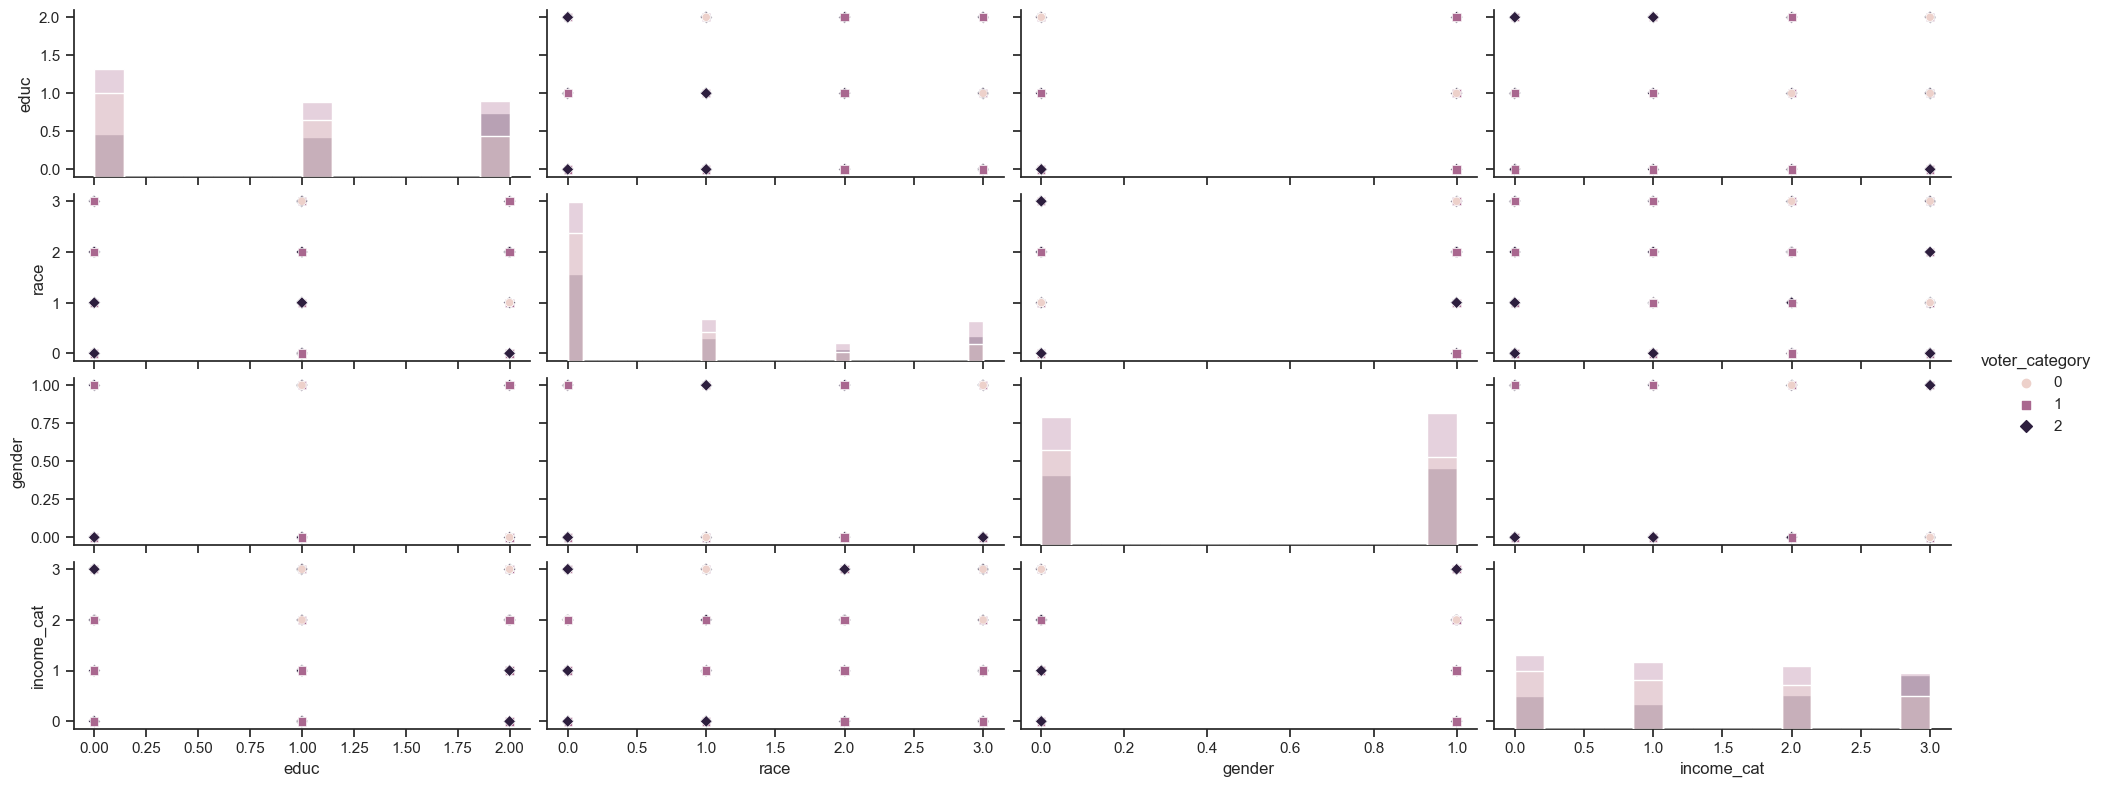

In [107]:
# Create a pair plot using seaborn
sns.set(style="ticks", color_codes=True)
plot = sns.pairplot(df, hue="voter_category", vars=["educ", "race", "gender", "income_cat"], diag_kind="hist", diag_kws={'alpha':0.3}, markers=["o", "s", "D"], height=2, aspect=2.5)

plt.show()

### CountPlot

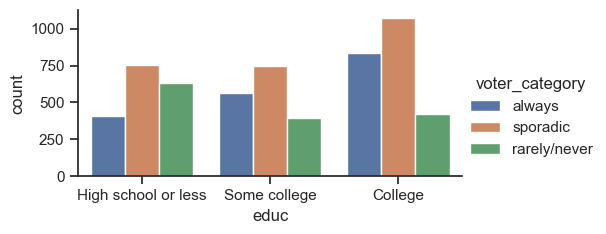

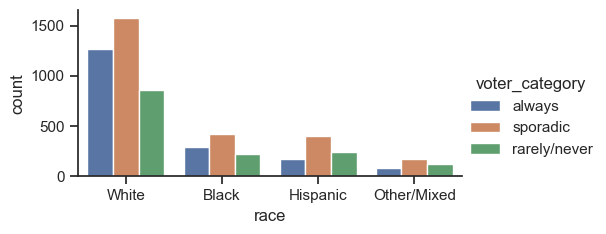

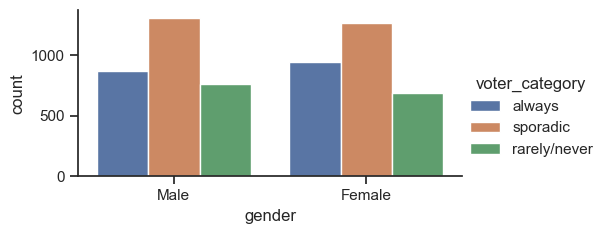

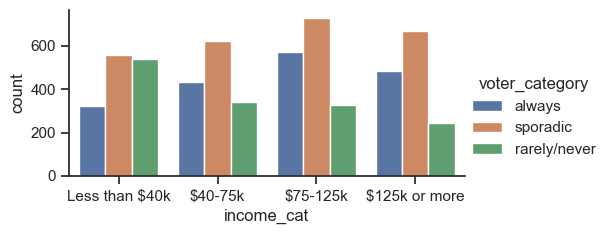

In [109]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('nonvoters_dataset.csv')

# Drop RespId column
df = df.drop(['RespId'], axis=1)

sns.catplot(data=df, x='educ', hue='voter_category', kind='count', height=2.5, aspect=2, order=["High school or less", "Some college", "College"])
sns.catplot(data=df, x='race', hue='voter_category', kind='count', height=2.5, aspect=2, order=["White", "Black", "Hispanic", "Other/Mixed"])
sns.catplot(data=df, x='gender', hue='voter_category', kind='count', height=2.5, aspect=2, order=["Male", "Female"])
sns.catplot(data=df, x='income_cat', hue='voter_category', kind='count', height=2.5, aspect=2, order=["Less than $40k", "$40-75k", "$75-125k", "$125k or more"])

### ViolinPlot

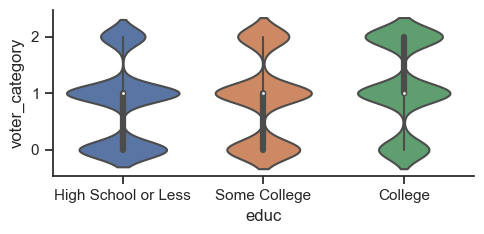

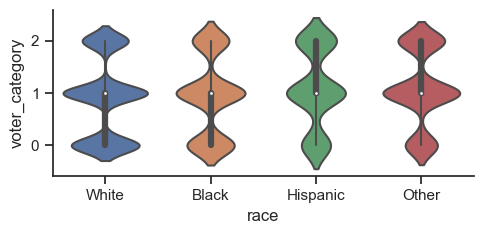

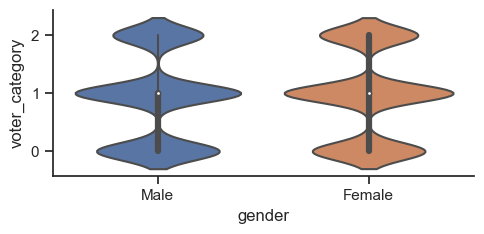

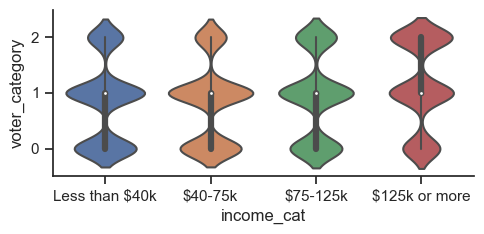

In [116]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('nonvoters_dataset.csv')

# Drop RespId column
df = df.drop(['RespId'], axis=1)

# Convert categorical variables to numerical using pandas factorize function
df['educ'] = pd.factorize(df['educ'])[0]
df['race'] = pd.factorize(df['race'])[0]
df['gender'] = pd.factorize(df['gender'])[0]
df['income_cat'] = pd.factorize(df['income_cat'])[0]
df['voter_category'] = pd.factorize(df['voter_category'])[0]

# Create the violin plots
educ_plot = sns.catplot(data=df, x="educ", y="voter_category", height=2.5, aspect=2, kind="violin")
race_plot = sns.catplot(data=df, x="race", y="voter_category", height=2.5, aspect=2, kind="violin")
gender_plot = sns.catplot(data=df, x="gender", y="voter_category", height=2.5, aspect=2, kind="violin")
income_plot = sns.catplot(data=df, x="income_cat", y="voter_category", height=2.5, aspect=2, kind="violin")

# Set the x-axis labels
educ_plot.set_xticklabels(['High School or Less', 'Some College', 'College'])
race_plot.set_xticklabels(['White', 'Black', 'Hispanic', 'Other'])
gender_plot.set_xticklabels(['Male', 'Female'])
income_plot.set_xticklabels(['Less than $40k', '$40-75k', '$75-125k', '$125k or more'])

## Buidling a model

### Preparing the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, explained_variance_score, mean_squared_error, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Load data from CSV
df = pd.read_csv('nonvoters_dataset.csv')

# Drop RespId column
df = df.drop(['RespId'], axis=1)

# Define mapping for educ variable
educ_mapping = {
    'High school or less': 0,
    'Some college': 1,
    'College': 2
}

# Define mapping for income_cat variable
income_cat_mapping = {
    'Less than $40k': 0,
    '$40-75k': 1,
    '$75-125k': 2,
    '$125k or more': 3
}

# Define mapping for voter_category variable
voter_category_mapping = {
    'rarely/never': 0,
    'sporadic': 1,
    'always': 2
}

# Map educ, income_cat, and voter_category variables to integer values
df['educ'] = df['educ'].map(educ_mapping)
df['income_cat'] = df['income_cat'].map(income_cat_mapping)
df['voter_category'] = df['voter_category'].map(voter_category_mapping)

# Perform one-hot encoding for race and gender variables
df = pd.get_dummies(df, columns=['race', 'gender'])

# Split into X and y training and test sets with an 80:20 ratio
X = df.drop('voter_category', axis=1)
y = df['voter_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

### Building and tuning the model


In [15]:
# I tried out SVM, random forest, and MLP classifier with grid/random/Bayesian search; this got best results
# Define the parameter grid for the hyperparameters to tune
# Try many different hidden layer sizes
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of the DecisionTreeClassifier with adjusted class weights
dt = DecisionTreeClassifier(class_weight={0: 2, 1: 1.86, 2: 2})

# Create an instance of GridSearchCV with the DecisionTreeClassifier model and the parameter grid
grid_search = GridSearchCV(dt, param_grid, cv=10)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the GridSearchCV object
print("Best parameters found:", grid_search.best_params_)

# Evaluate the performance of the best model on the testing data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best parameters found: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.4606164383561644


## Print Model Results

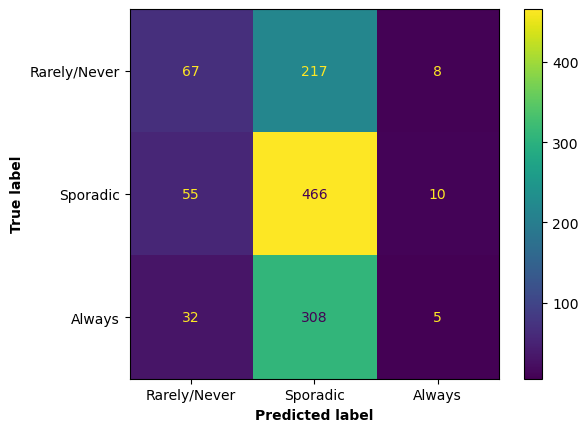

Accuracy:   0.4606
Variance:   -0.1362
MSE:        0.6421
Precision:  0.3868
Recall:     0.4606


In [16]:
# Define custom labels
labels = ['Rarely/Never', 'Sporadic', 'Always']

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.xlabel('Predicted label', fontweight='bold')
plt.ylabel('True label', fontweight='bold')
plt.show()

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:   {accuracy:.4f}")

# Calculate the variance of the model
variance = explained_variance_score(y_test, y_pred)
print(f"Variance:   {variance:.4f}")

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print(f"MSE:        {mse:.4f}")

# Calculate the precision of the model
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
print(f"Precision:  {precision:.4f}")

# Calculate the recall of the model
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
print(f"Recall:     {recall:.4f}")